In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
import random

In [2]:
xml_src = glob.glob("./val/*.xml")

In [3]:
# Get Person Boxes

person_img_names = []
person_boxes = []

for xml_path in xml_src:
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":
                
                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text
                
                person_boxes.append([obj_name, left, top, right, bottom])
             
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])

In [20]:
print(len(person_boxes))

13262


In [25]:
x1, y1, x2, y2 = [], [], [], []

for box in person_boxes:
    x1.append(int(box[1]))
    y1.append(int(box[2]))
    x2.append(int(box[3]))
    y2.append(int(box[4]))

In [26]:
x1 = np.array(x1)
y1 = np.array(y1)
x2 = np.array(x2)
y2 = np.array(y2)

person_w = x2 - x1
person_h = y2 - y1

In [41]:
box_sizes = []

for i in range(len(person_w)):
    box_sizes.append([int(person_w[i]), int(person_h[i])])

In [42]:
box_sizes = np.array(box_sizes)
box_sizes.shape

(13262, 2)

In [43]:
for i in range(10):
    print(box_sizes[i])

[39 81]
[ 27 111]
[28 72]
[17 29]
[15 15]
[17 28]
[12 21]
[ 69 169]
[ 48 126]
[ 55 128]


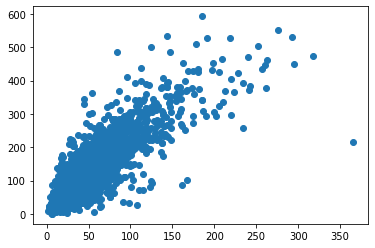

In [45]:
plt.scatter(box_sizes[:,0], box_sizes[:,1], label='True Position')

In [46]:
text_file = open("./person_boxes.txt", "w+")
for infor in person_boxes: 
    print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
text_file.close()

In [47]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [53]:
box_sizes[100][0]

33

In [56]:
cannot_w = []
cannot_h = []

for i in range(len(box_sizes)):
    if box_sizes[i][0] < 32: 
        cannot_w.append(i)
    if box_sizes[i][1] < 20: 
        cannot_h.append(i)

In [57]:
print(len(cannot_w))

9770


In [60]:
can_w = []
can_h = []

for i in range(len(box_sizes)):
    if box_sizes[i][0] >= 32: 
        can_w.append(i)
    if box_sizes[i][1] >= 20: 
        can_h.append(i)

In [61]:
print(len(can_w))

3492


In [64]:
print(np.amin(cannot_w))

1


In [66]:
print(len(person_img_names))

13262


In [69]:
# Get Person Boxes

# person_img_names = []
person_boxes = []

for name in person_img_names: 

    xml_path = "./val/" + name + ".xml"

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":
                
                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text
                
                if (int(right) - int(left)) == 2: print(name)

b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d
b44b6eff-dda9780d


In [ ]:
b44b6eff-dda9780d

In [70]:
xml_path = "./val/b44b6eff-dda9780d.xml"
img_info = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])
       
print("Num of Objs: ", len(img_info))
img_info

Num of Objs:  23


[['person', '283', '491', '285', '499'],
 ['person', '87', '299', '131', '370'],
 ['person', '257', '296', '284', '348'],
 ['person', '349', '289', '368', '331'],
 ['person', '377', '283', '391', '325'],
 ['person', '424', '286', '431', '305'],
 ['person', '430', '284', '441', '300'],
 ['person', '448', '292', '457', '309'],
 ['person', '456', '288', '466', '318'],
 ['person', '492', '282', '503', '306'],
 ['person', '497', '285', '508', '315'],
 ['person', '544', '282', '555', '310'],
 ['person', '528', '284', '540', '310'],
 ['person', '560', '279', '571', '307'],
 ['person', '1080', '244', '1094', '268'],
 ['person', '1091', '238', '1111', '265'],
 ['person', '1117', '233', '1146', '289'],
 ['person', '1144', '229', '1171', '278'],
 ['person', '1251', '220', '1273', '244'],
 ['person', '463', '282', '479', '319'],
 ['person', '651', '271', '658', '280'],
 ['person', '620', '275', '629', '288'],
 ['person', '641', '271', '650', '279']]

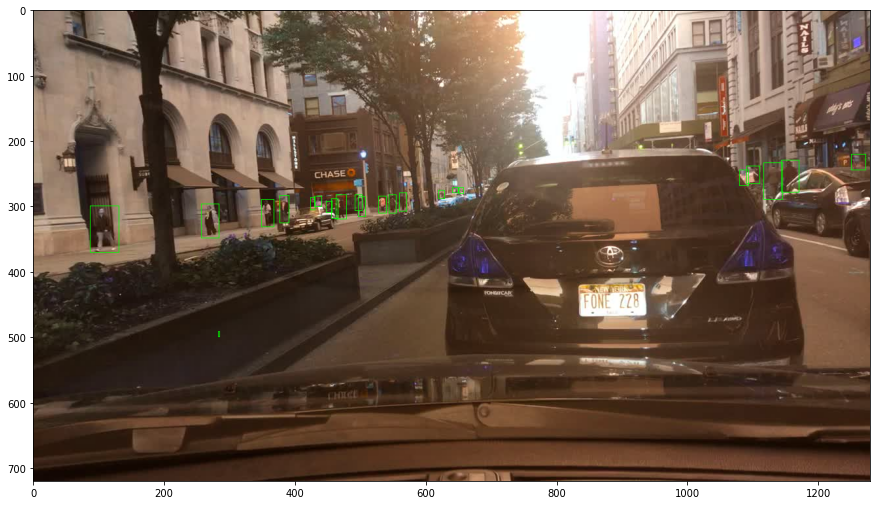

In [71]:
image = cv2.imread("b44b6eff-dda9780d.jpg")

dummy = image.copy()

for obj in img_info:
    true_person_img = cv2.rectangle(dummy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
                                                               
plt.figure(figsize = (15, 10))
plt.imshow(true_person_img)
plt.show()

In [72]:
cv2.imwrite("persons.jpg", true_person_img)

True

In [78]:
widths = []

for info in img_info:
    width = int(info[3]) - int(info[1])
    widths.append(["person", width])
    
print(widths)

[['person', 2], ['person', 44], ['person', 27], ['person', 19], ['person', 14], ['person', 7], ['person', 11], ['person', 9], ['person', 10], ['person', 11], ['person', 11], ['person', 11], ['person', 12], ['person', 11], ['person', 14], ['person', 20], ['person', 29], ['person', 27], ['person', 22], ['person', 16], ['person', 7], ['person', 9], ['person', 9]]


In [79]:
widths

[['person', 2],
 ['person', 44],
 ['person', 27],
 ['person', 19],
 ['person', 14],
 ['person', 7],
 ['person', 11],
 ['person', 9],
 ['person', 10],
 ['person', 11],
 ['person', 11],
 ['person', 11],
 ['person', 12],
 ['person', 11],
 ['person', 14],
 ['person', 20],
 ['person', 29],
 ['person', 27],
 ['person', 22],
 ['person', 16],
 ['person', 7],
 ['person', 9],
 ['person', 9]]